# EDA with Time Series

- Pandas Data Reader -> {Financial Data}
- Date Time Index
- Time Resampling
- Time Shifts
- Mean Rolling and Expanding 
- Time Series Visualization 
- Sample Project

In [14]:
import pandas as pd
from datetime import datetime

## Importing yahoo finance data

In [18]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [23]:
import yfinance as yf
# getting the tesla stock price in last year 
stock_data = yf.download('TSLA', start='2017-02-27', end='2022-02-24')
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


<Axes: xlabel='Date'>

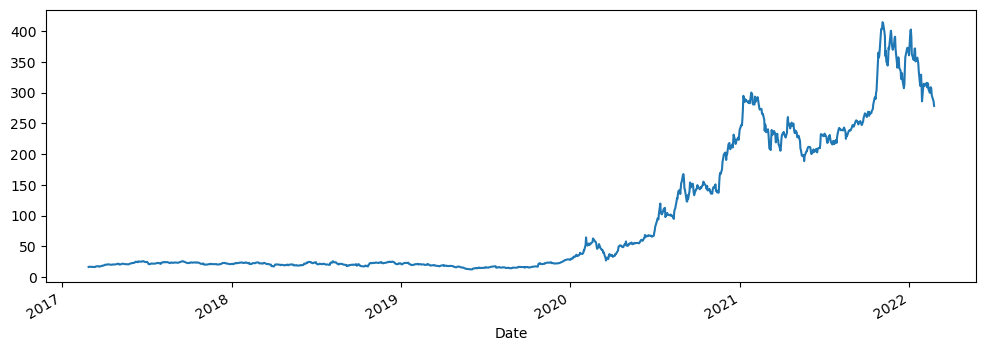

In [24]:
stock_data['High'].plot(figsize=(12,4))

stock price started increasing from 2020 as tesla got famous and then it started going down when russia ukraine war started in 2022

<Axes: xlabel='Date'>

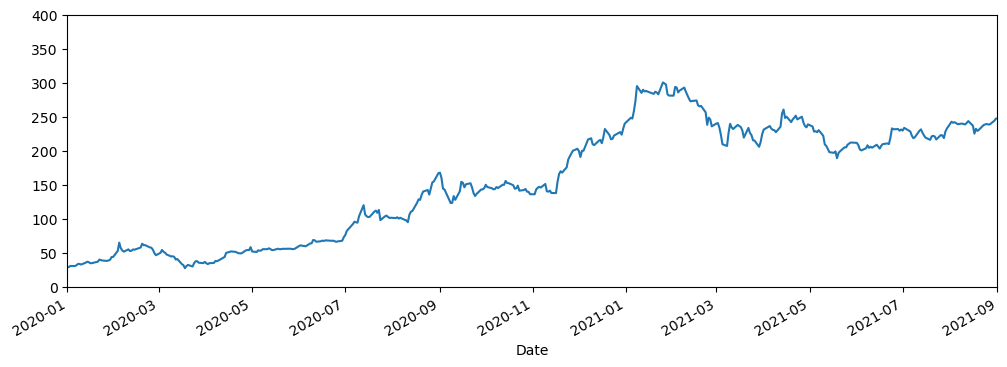

In [27]:
#xlimit and ylimit
stock_data['High'].plot(xlim = ['2020-01-01','2021-09-01'],ylim =[0,400],figsize=(12,4))

<Axes: xlabel='Date'>

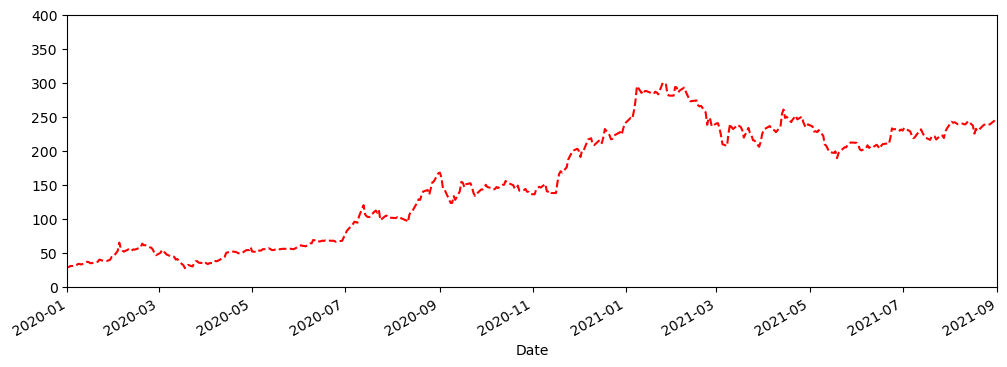

In [30]:
#xlimit and ylimit and coloring 
stock_data['High'].plot(xlim = ['2020-01-01','2021-09-01'],ylim =[0,400],figsize=(12,4),c='red',ls='--')

In [31]:
stock_data.index

DatetimeIndex(['2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10',
               ...
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-14',
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-22', '2022-02-23'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [40]:
# reading for particular time
index = stock_data.loc['2020-01-01':'2021-09-01'].index

In [37]:
# opening price of share
share_open = stock_data.loc['2020-01-01':'2021-09-01']['Open']
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [38]:
import matplotlib.pyplot as pyplot
%matplotlib inline

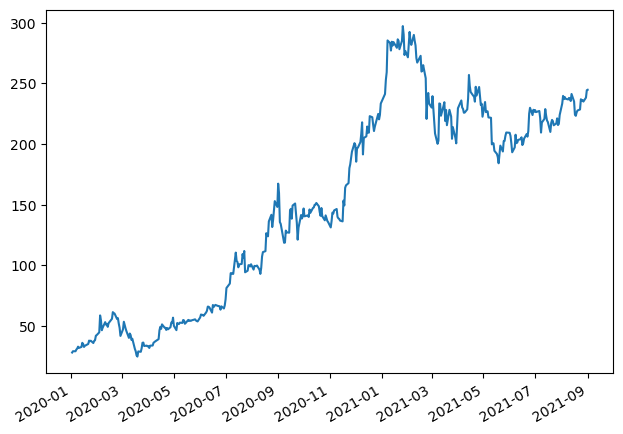

In [43]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() # atuo format x date is used to prevent overlapping in the time index
axis.plot(index,share_open)

In [44]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-02-27 to 2022-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 101.1 KB


In [49]:
df_tesla = stock_data.reset_index()

In [50]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


# Converting the time column as a datetime type 

In [51]:
pd.to_datetime(df_tesla['Date'])

0      2017-02-27
1      2017-02-28
2      2017-03-01
3      2017-03-02
4      2017-03-03
          ...    
1253   2022-02-16
1254   2022-02-17
1255   2022-02-18
1256   2022-02-22
1257   2022-02-23
Name: Date, Length: 1258, dtype: datetime64[ns]

In [57]:
# to reset the date as an index we can do 
df_tesla = df_tesla.set_index ('Date',drop=True)
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2022-02-16,304.683319,308.809998,300.403320,307.796661,307.796661,51294300
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700


# Datetime

In [59]:
from datetime import datetime   

In [60]:
datetime(2021,11,21) # we get a datetime

datetime.datetime(2021, 11, 21, 0, 0)

In [79]:
datetime.now() # shows current time 

datetime.datetime(2024, 7, 8, 16, 44, 33, 241736)

In [81]:
date = datetime(2021,11,21)

In [83]:
date

datetime.datetime(2021, 11, 21, 0, 0)

In [82]:
date.date()

datetime.date(2021, 11, 21)

In [84]:
date.day

21

In [85]:
date.weekday()

6

In [86]:
date.year

2021

In [87]:
date.month

11

## Time Resampling

In [89]:
df_tesla.resample(rule ='A').min()
# this is showing the minimum of everything for each year

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,16.279333,16.433332,16.134001,16.246000,16.246000,43791000
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,276.809998,278.433319,253.520004,254.679993,254.679993,50729100


<Axes: xlabel='Date'>

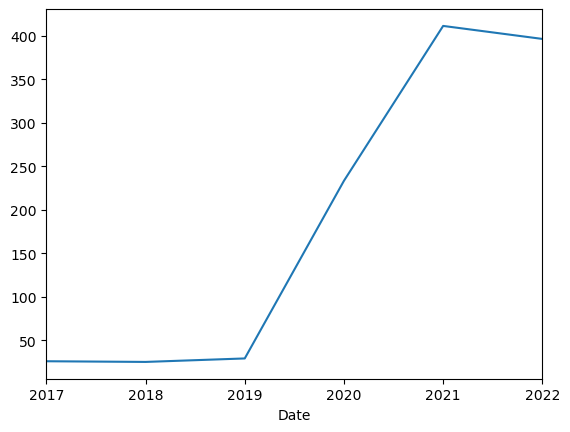

In [93]:
# 'A' means year end frequency 
df_tesla.resample(rule ='A').max()['Open'].plot()
# plotting the line for each year 
# we can see the growth directly

In [ ]:
## https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [94]:
##quaterly 
df_tesla.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,18.582001,18.799999,18.480667,18.553333,18.553333,171912000
2017-04-01,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-01,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-01,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-01,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-01,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

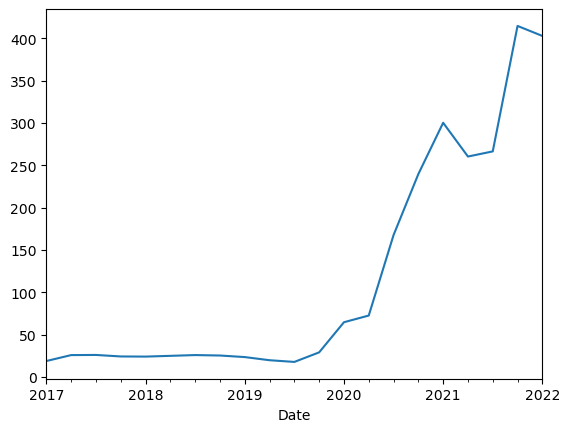

In [95]:
df_tesla.resample(rule='QS').max()['High'].plot()

<Axes: xlabel='Date'>

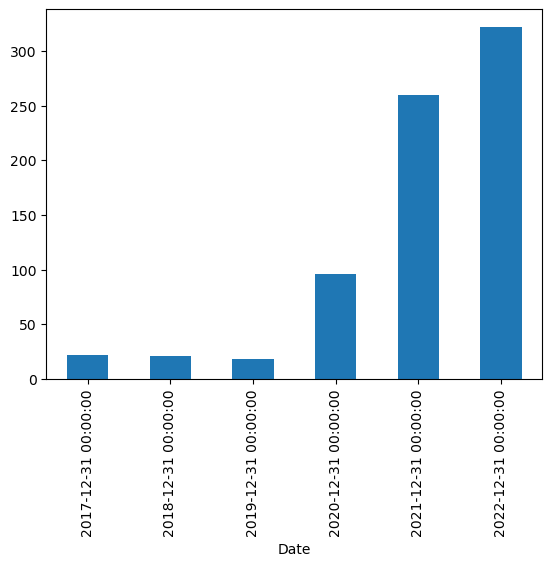

In [98]:
##plotting 
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

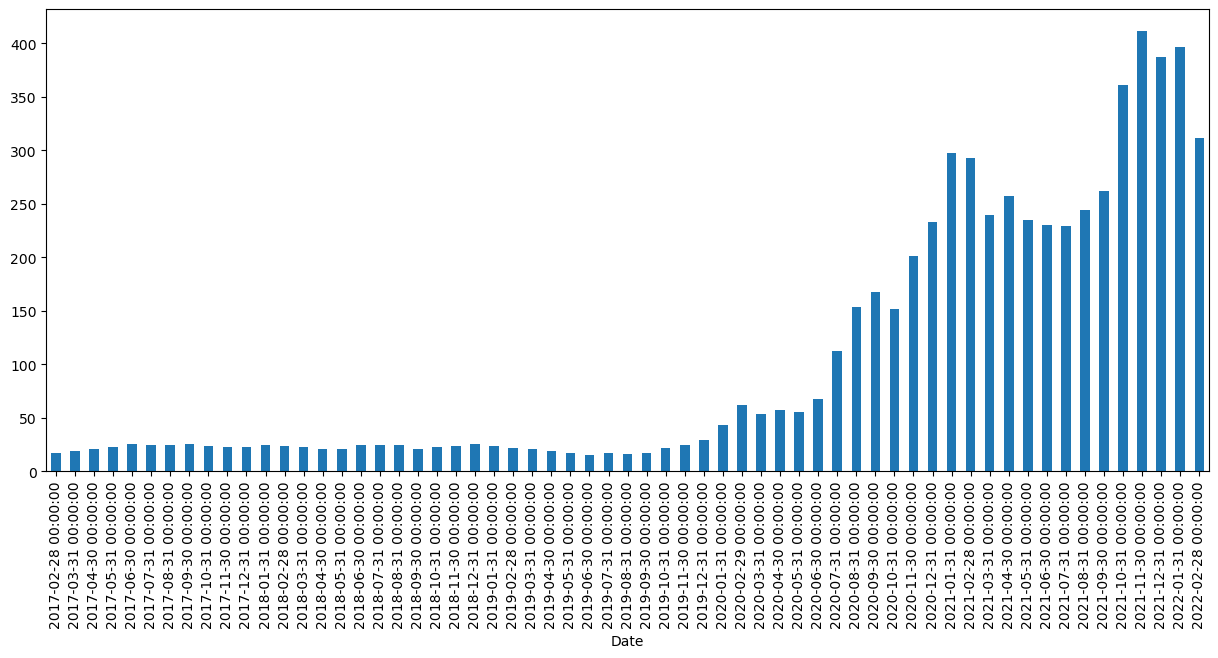

In [103]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar', figsize=(15,6))

# Rolling -- Moving Average

In [108]:
df_tesla['High'].rolling(4).mean().head(10)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02    16.791500
2017-03-03    16.850500
2017-03-06    16.862166
2017-03-07    16.846167
2017-03-08    16.792667
2017-03-09    16.738667
2017-03-10    16.652000
Name: High, dtype: float64

In [109]:
df_tesla['High']

Date
2017-02-27     16.557333
2017-02-28     16.733334
2017-03-01     16.990000
2017-03-02     16.885332
2017-03-03     16.793333
                 ...    
2022-02-16    308.809998
2022-02-17    306.166656
2022-02-18    295.623322
2022-02-22    285.576660
2022-02-23    278.433319
Name: High, Length: 1258, dtype: float64

This will give us the rolling mean in the window of 4 

In [113]:
df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(30).mean()

<Axes: xlabel='Date'>

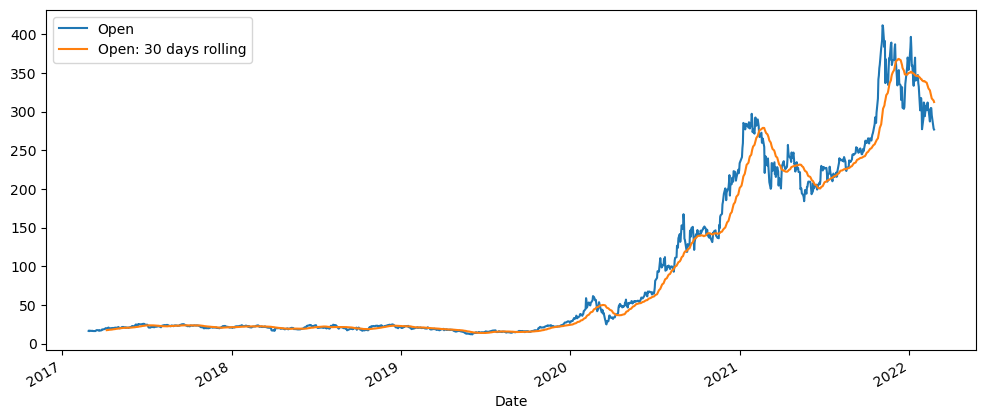

In [114]:
df_tesla[['Open','Open: 30 days rolling']].plot(figsize=(12,5))